In [1]:
# `pip install mplfinance

In [2]:
# pip install plotly

# import Libary

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from tensorflow import keras
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from sklearn.svm import SVC
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense
from sklearn.metrics import roc_auc_score




#EDA

In [5]:
# Load the dataset
df = pd.read_csv('Apple.csv')
df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

In [6]:
# to chek num od rows and columns
df.shape

(2011, 7)

In [7]:
# Gating information of the dataset  like datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [12]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [13]:
#Descriptive Summary
df.describe()

Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume  
count  2.011000e+03  
mean   5.949670e+07  
std    4.683856e+07  
min    1.136200e+07  
25%    2.758565e+07  
50%    4.346900e+07  
75%    7.471030e+07  
max    3.765300e+08

In [14]:
# cheking the sum of null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
# printing  first 5 adj Close price value
df['Adj Close'].head()

0    50.765709
1    51.038536
2    51.605175
3    52.144630
4    52.061932
Name: Adj Close, dtype: float64

In [16]:
# to getting minimum  & maximum Close price value
max(df[['Adj Close']].values),min(df[['Adj Close']].values)

(array([289.522614]), array([48.921928]))

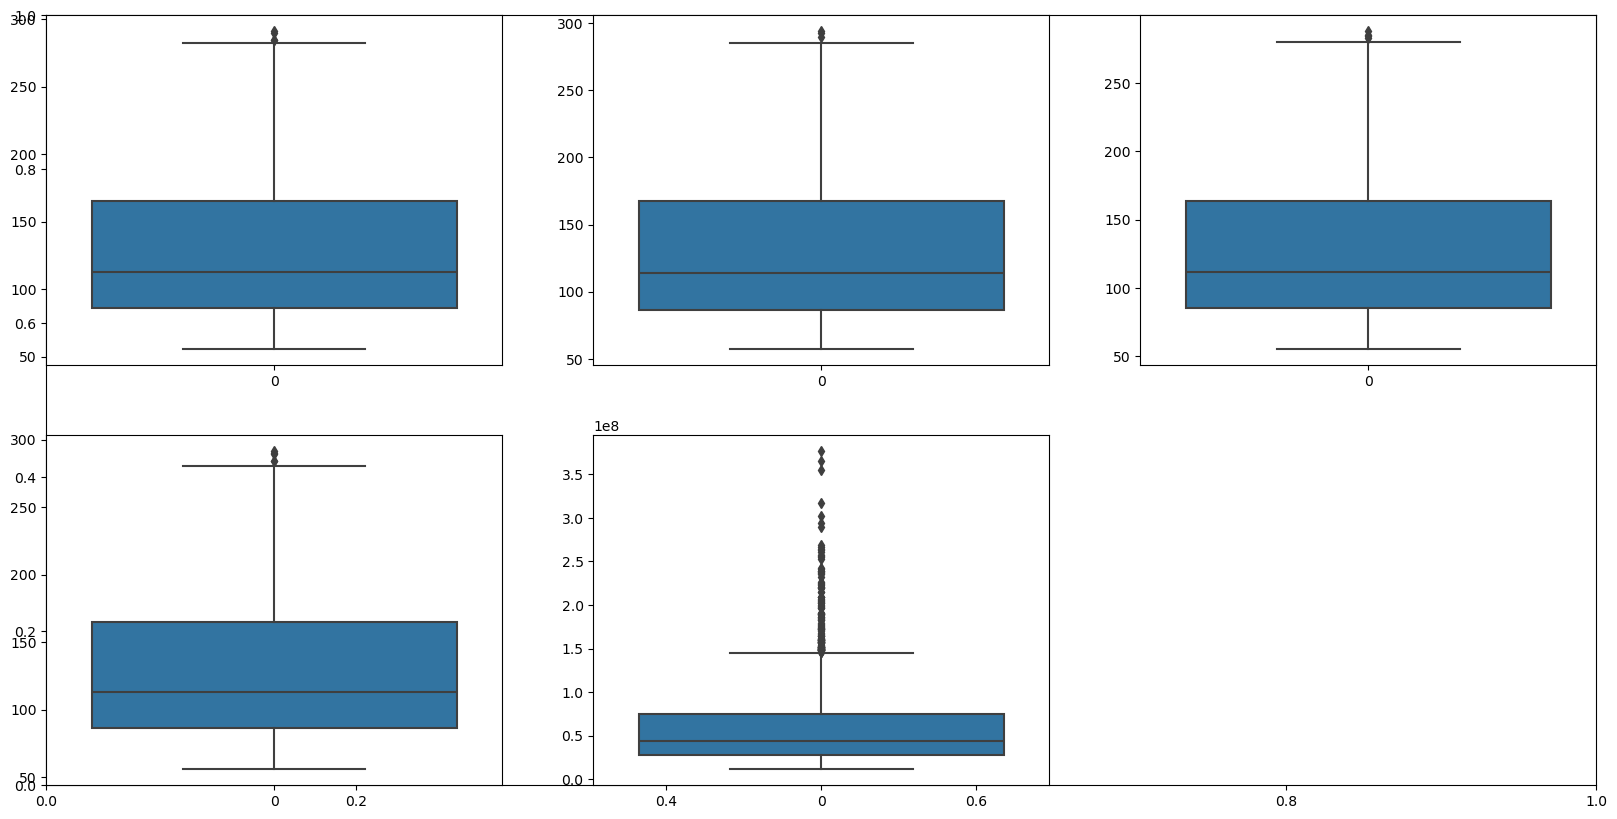

In [17]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(df[['Open', 'High', 'Low', 'Close', 'Volume']]):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

#Remove Outliers

In [18]:
# Calculate Q1 and Q3
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
outliers = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]


#Pair Plot

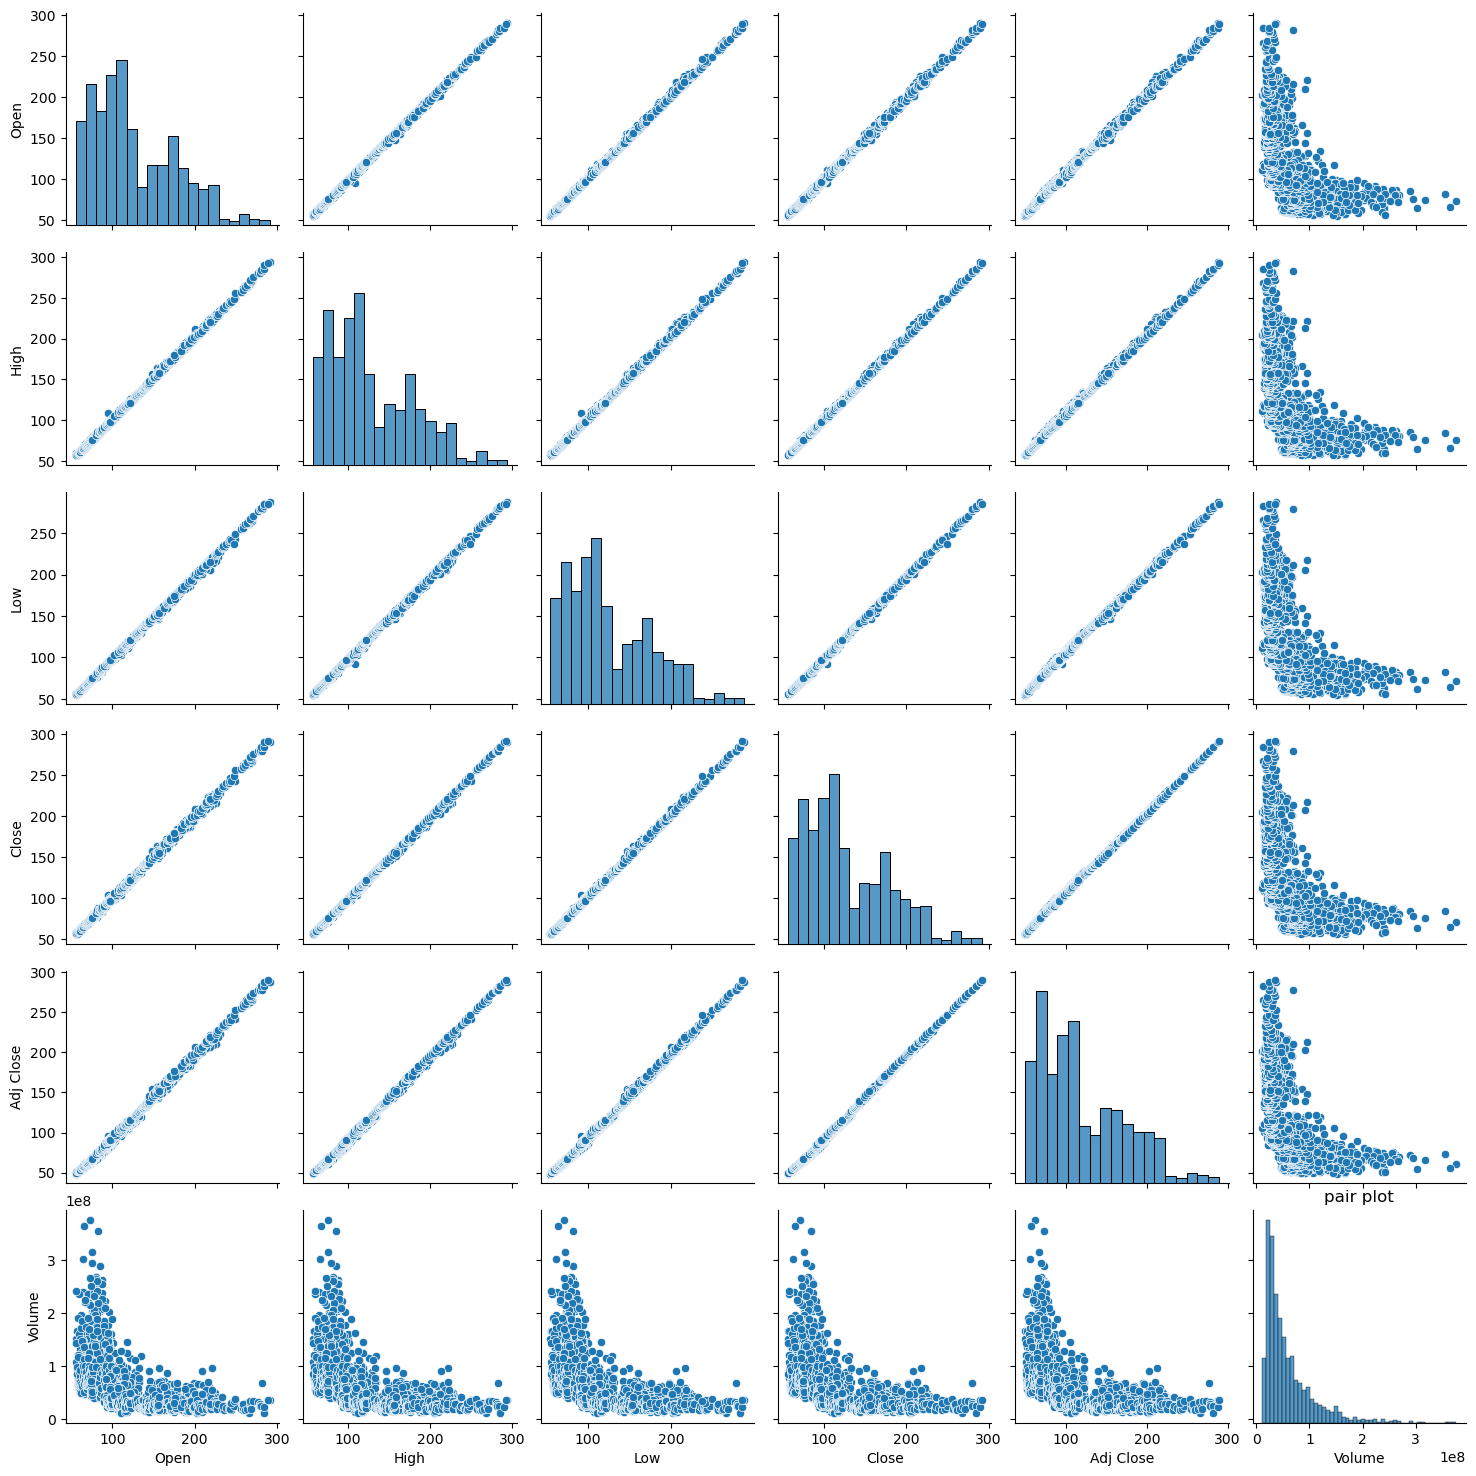

In [19]:
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Create pairplot for selected columns
sns.pairplot(df[columns_to_plot])
plt.title('pair plot')
plt.show()

#Histogram

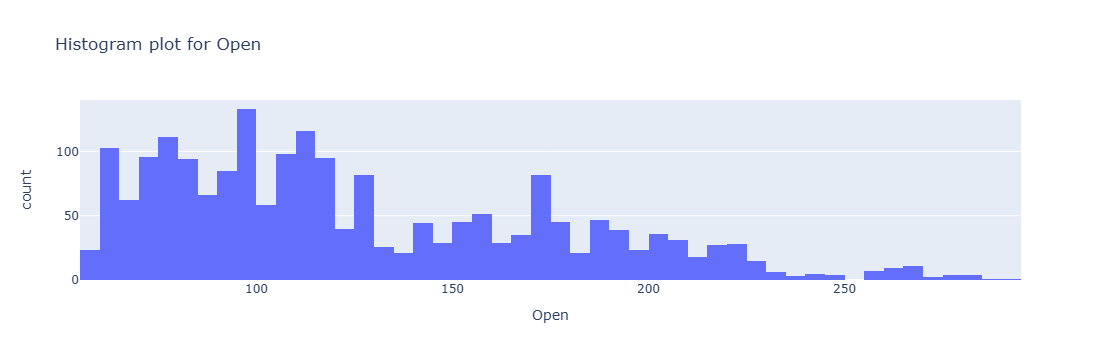

The skewness for  Open  :  0.7693514606162878 


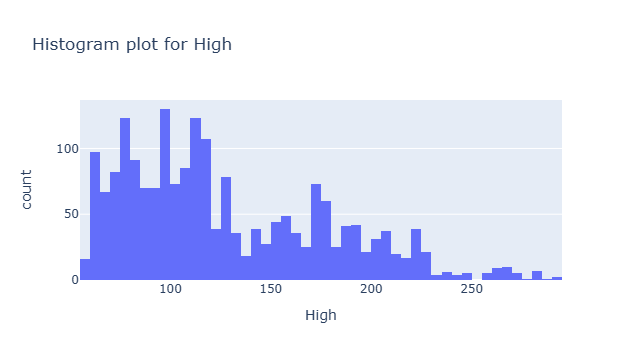

The skewness for  High  :  0.7709343154504041 


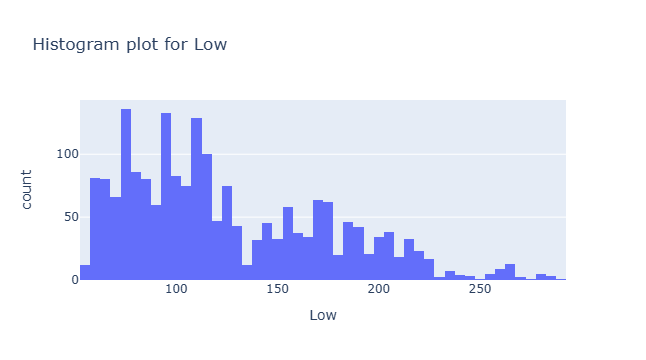

The skewness for  Low  :  0.770875714185213 


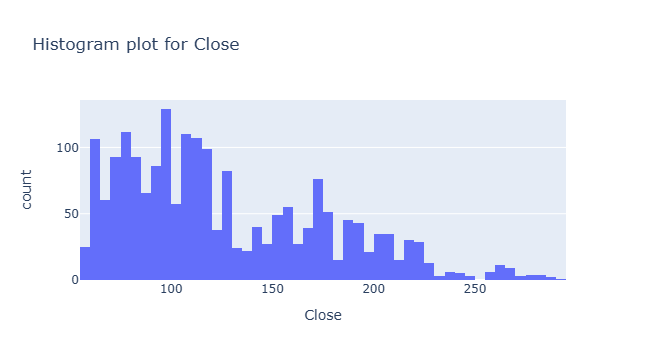

The skewness for  Close  :  0.7738383526895003 


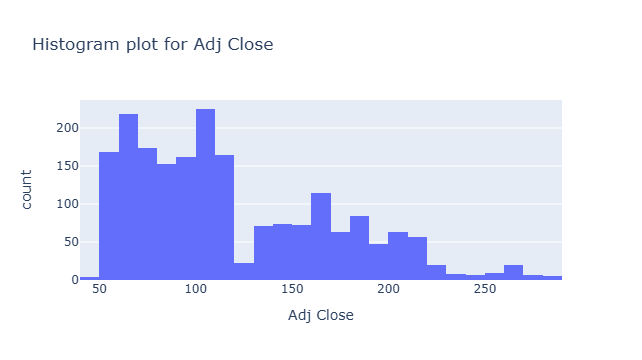

The skewness for  Adj Close  :  0.7940559324371017 


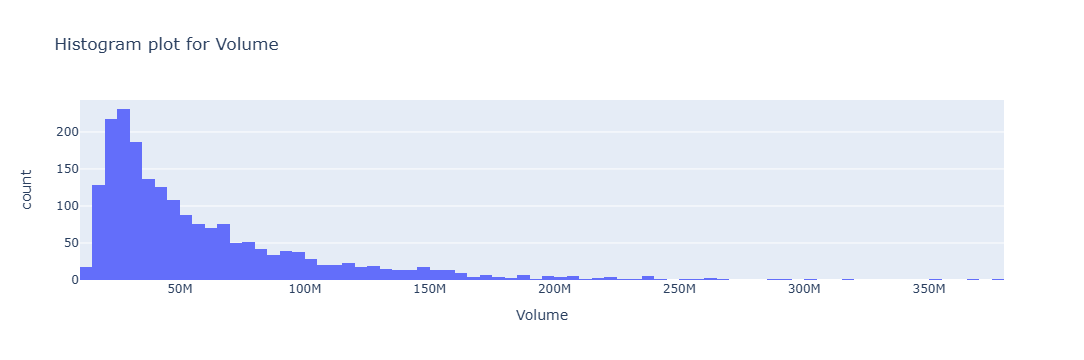

The skewness for  Volume  :  2.1650461486206027 


In [20]:
# Creating a function to plot histogram
def plot_hist(column):
    fig = px.histogram(df, x = column, title="Histogram plot for "+ column)
    fig.show()
    print("\033[1mThe skewness for ", column, " : ", df[column].skew(),"\033[0m")

  #Plotting histogram plot for numerical columns
for each in df.select_dtypes(include='number').columns:
    plot_hist(each)

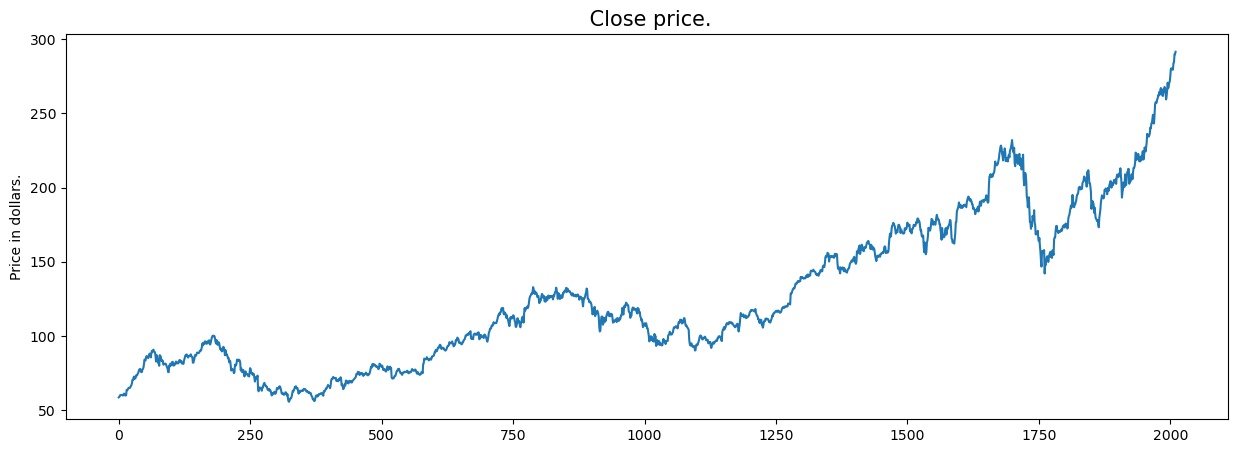

In [21]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title(' Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

Text(0.5, 1.0, 'Closing price of Apple Data')

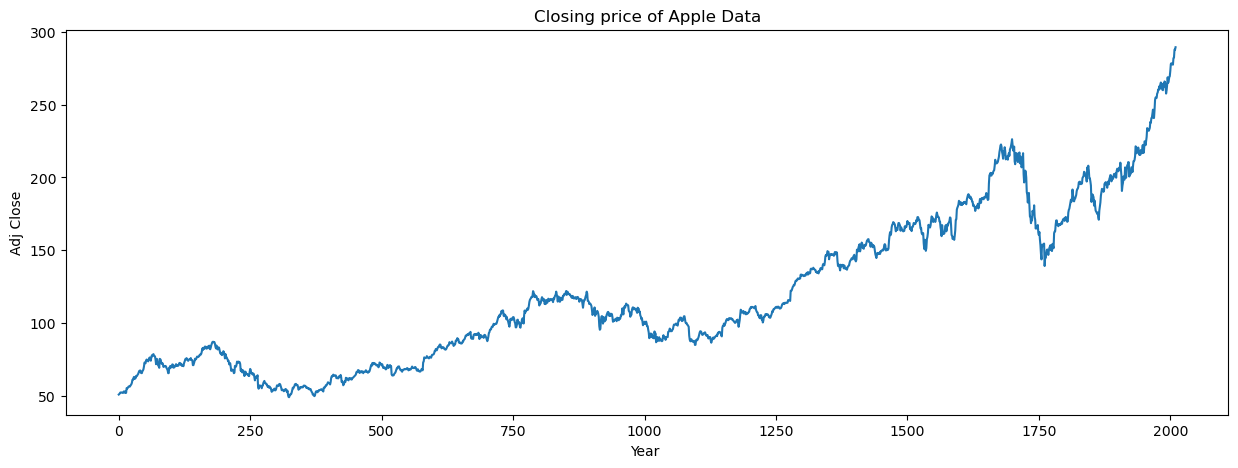

In [22]:
plt.figure(figsize = (15,5))
df['Adj Close'].plot()
plt.xlabel("Year ")
plt.ylabel("Adj Close")
plt.title ("Closing price of Apple Data")

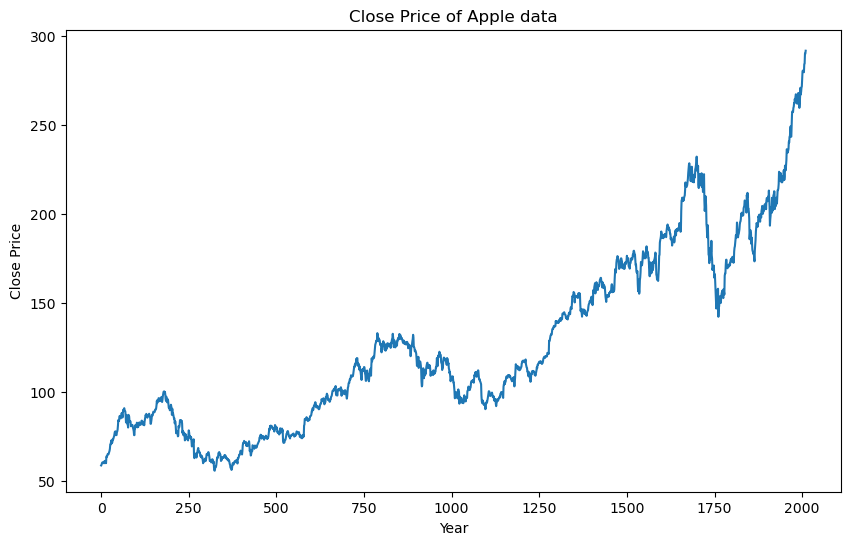

In [23]:

def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)  # Set the figure size
    values.plot()  # Plot the values
    plt.xlabel("Year")  # Label for the x-axis
    plt.ylabel(column_name)  # Label for the y-axis
    plt.title(f"{column_name} of Apple data")  # Title for the plot

# Example usage (assuming 'df' is your DataFrame and 'Close' is one of the columns):
plot_graph(figsize=(10, 6), values=df['Close'], column_name="Close Price")

# Show the plot after the function call
plt.show()

In [24]:
#  Calculate moving Average for given data set

df['MA_for_50_days'] = df['Adj Close'].rolling(50).mean()
df['MA_for_30_days'] = df['Adj Close'].rolling(30).mean()
df['MA_for_10_days'] = df['Adj Close'].rolling(10).mean()

<Figure size 1500x500 with 0 Axes>

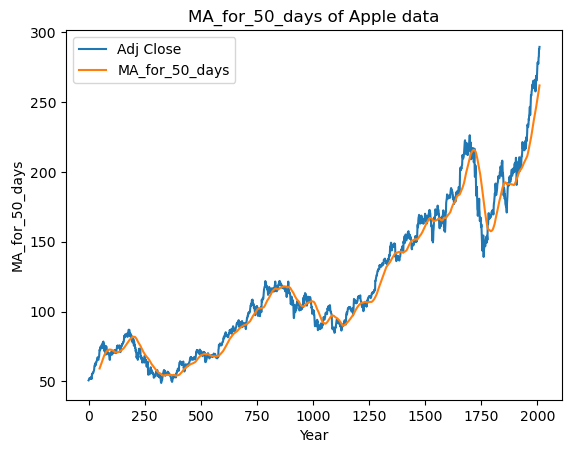

In [25]:
# ploating graph  50 day moving average  verses Adj close price
plot_graph((15,5),df[['Adj Close','MA_for_50_days']],'MA_for_50_days')

<Figure size 1500x500 with 0 Axes>

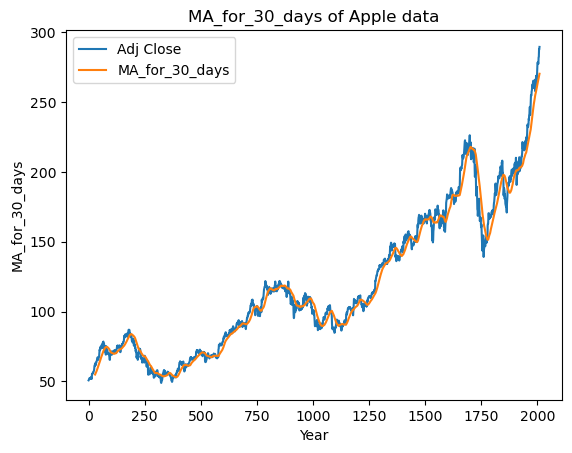

In [26]:
# ploating graph  30 day moving average  verses Adj close price
plot_graph((15,5),df[['Adj Close','MA_for_30_days']],'MA_for_30_days')   

<Figure size 1500x500 with 0 Axes>

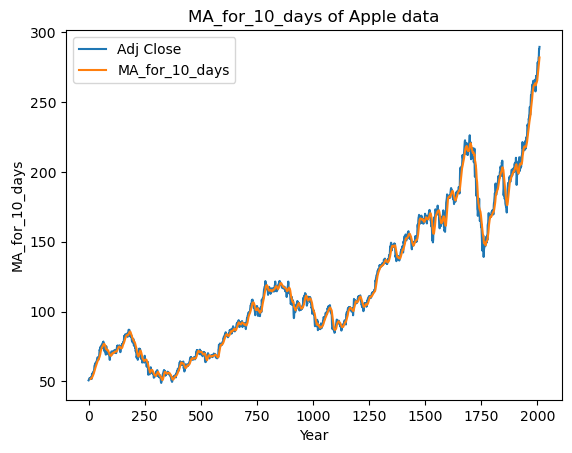

In [27]:
# ploating graph 10 day moving average  verses Adj close price
plot_graph((15,5),df[['Adj Close','MA_for_10_days']],'MA_for_10_days')

<Figure size 1500x500 with 0 Axes>

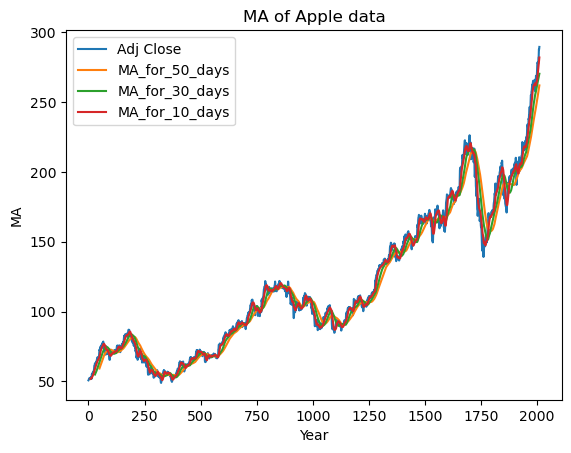

In [28]:
# ploating graph betweens Moving average of 50 days 30 days & 10 days
plot_graph((15,5),df[['Adj Close','MA_for_50_days','MA_for_30_days','MA_for_10_days']],'MA')

In [29]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'MA_for_50_days', 'MA_for_30_days', 'MA_for_10_days'],
      dtype='object')

In [8]:
df[df['Close'] == df['Adj Close']].shape

(0, 7)

In [9]:
df.shape

(2011, 7)

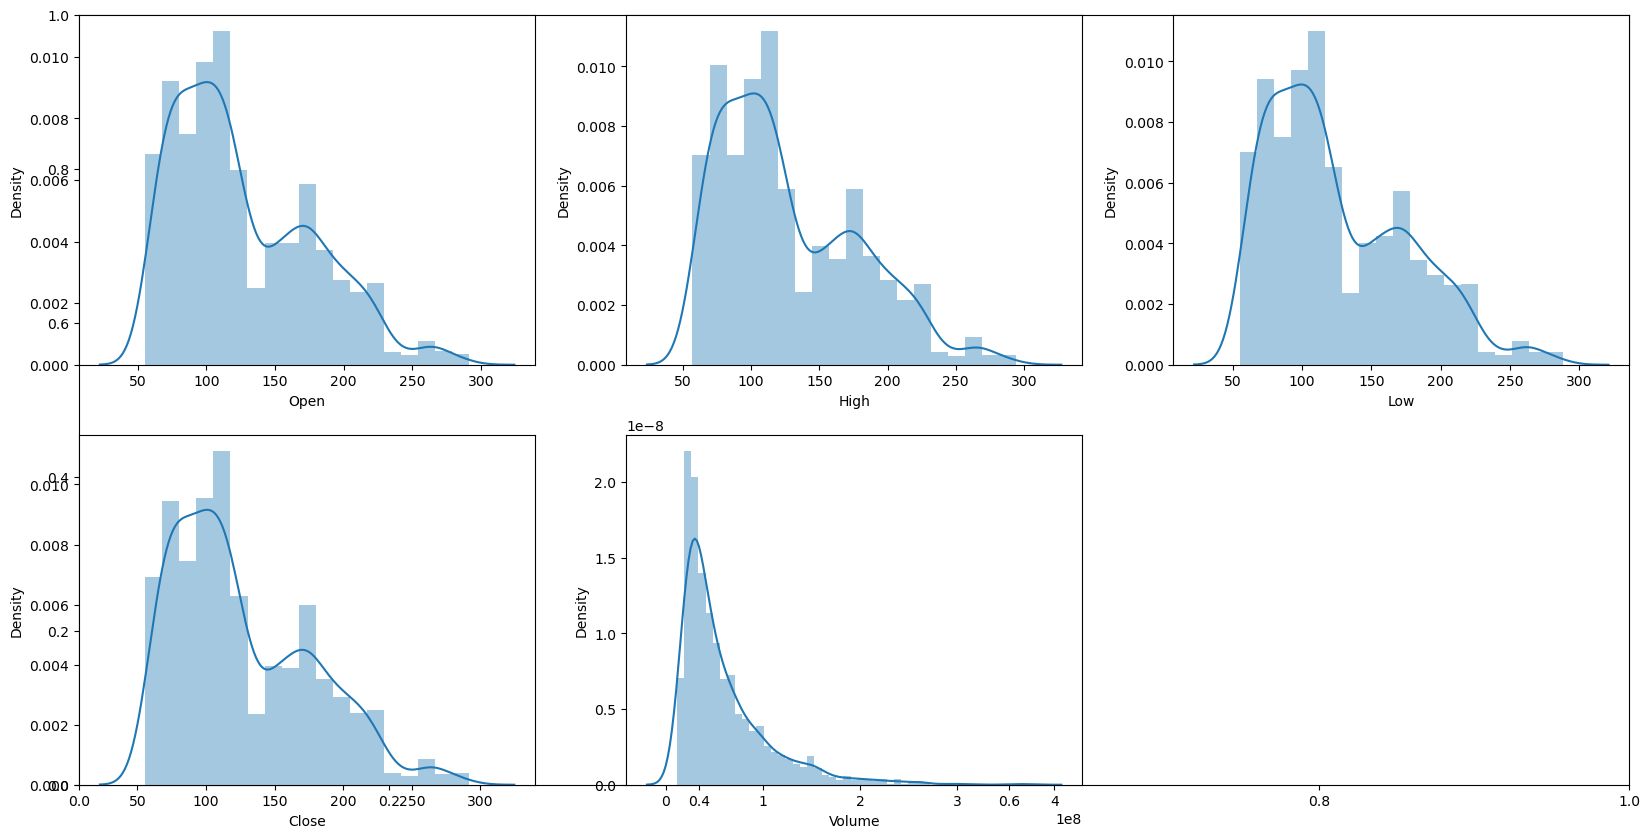

In [10]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#Feature Engineering

In [34]:
print(df['Date'].head())


0    2012-01-03
1    2012-01-04
2    2012-01-05
3    2012-01-06
4    2012-01-09
Name: Date, dtype: object


In [35]:
df['Date']

0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
2006    2019-12-23
2007    2019-12-24
2008    2019-12-26
2009    2019-12-27
2010    2019-12-30
Name: Date, Length: 2011, dtype: object

In [36]:
df['Date'].isnull().sum()  # Check for missing values


0

In [37]:

# Split the 'Date' column
splitted = df['Date'].str.split('-', expand=True)

# Extract day, month, and year
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

# Display the result
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709   
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536   
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175   
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630   
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932   

     Volume  MA_for_50_days  MA_for_30_days  MA_for_10_days  day  month  year  
0  75555200             NaN             NaN             NaN    1   2012     3  
1  65005500             NaN             NaN             NaN    1   2012     4  
2  67817400             NaN             NaN             NaN    1   2012     5  
3  79573200             NaN             NaN             NaN    1   2012     6  
4  98506100             NaN             NaN             NaN    1   2012     9  


In [38]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709   
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536   
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175   
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630   
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932   

     Volume  MA_for_50_days  MA_for_30_days  MA_for_10_days  day  month  year  \
0  75555200             NaN             NaN             NaN    1   2012     3   
1  65005500             NaN             NaN             NaN    1   2012     4   
2  67817400             NaN             NaN             NaN    1   2012     5   
3  79573200             NaN             NaN             NaN    1   2012     6   
4  98506100             NaN             NaN             NaN    1   2012     9   

   is_quarter_end  
0               0  
1               0  
2               0  
3               0  
4               0

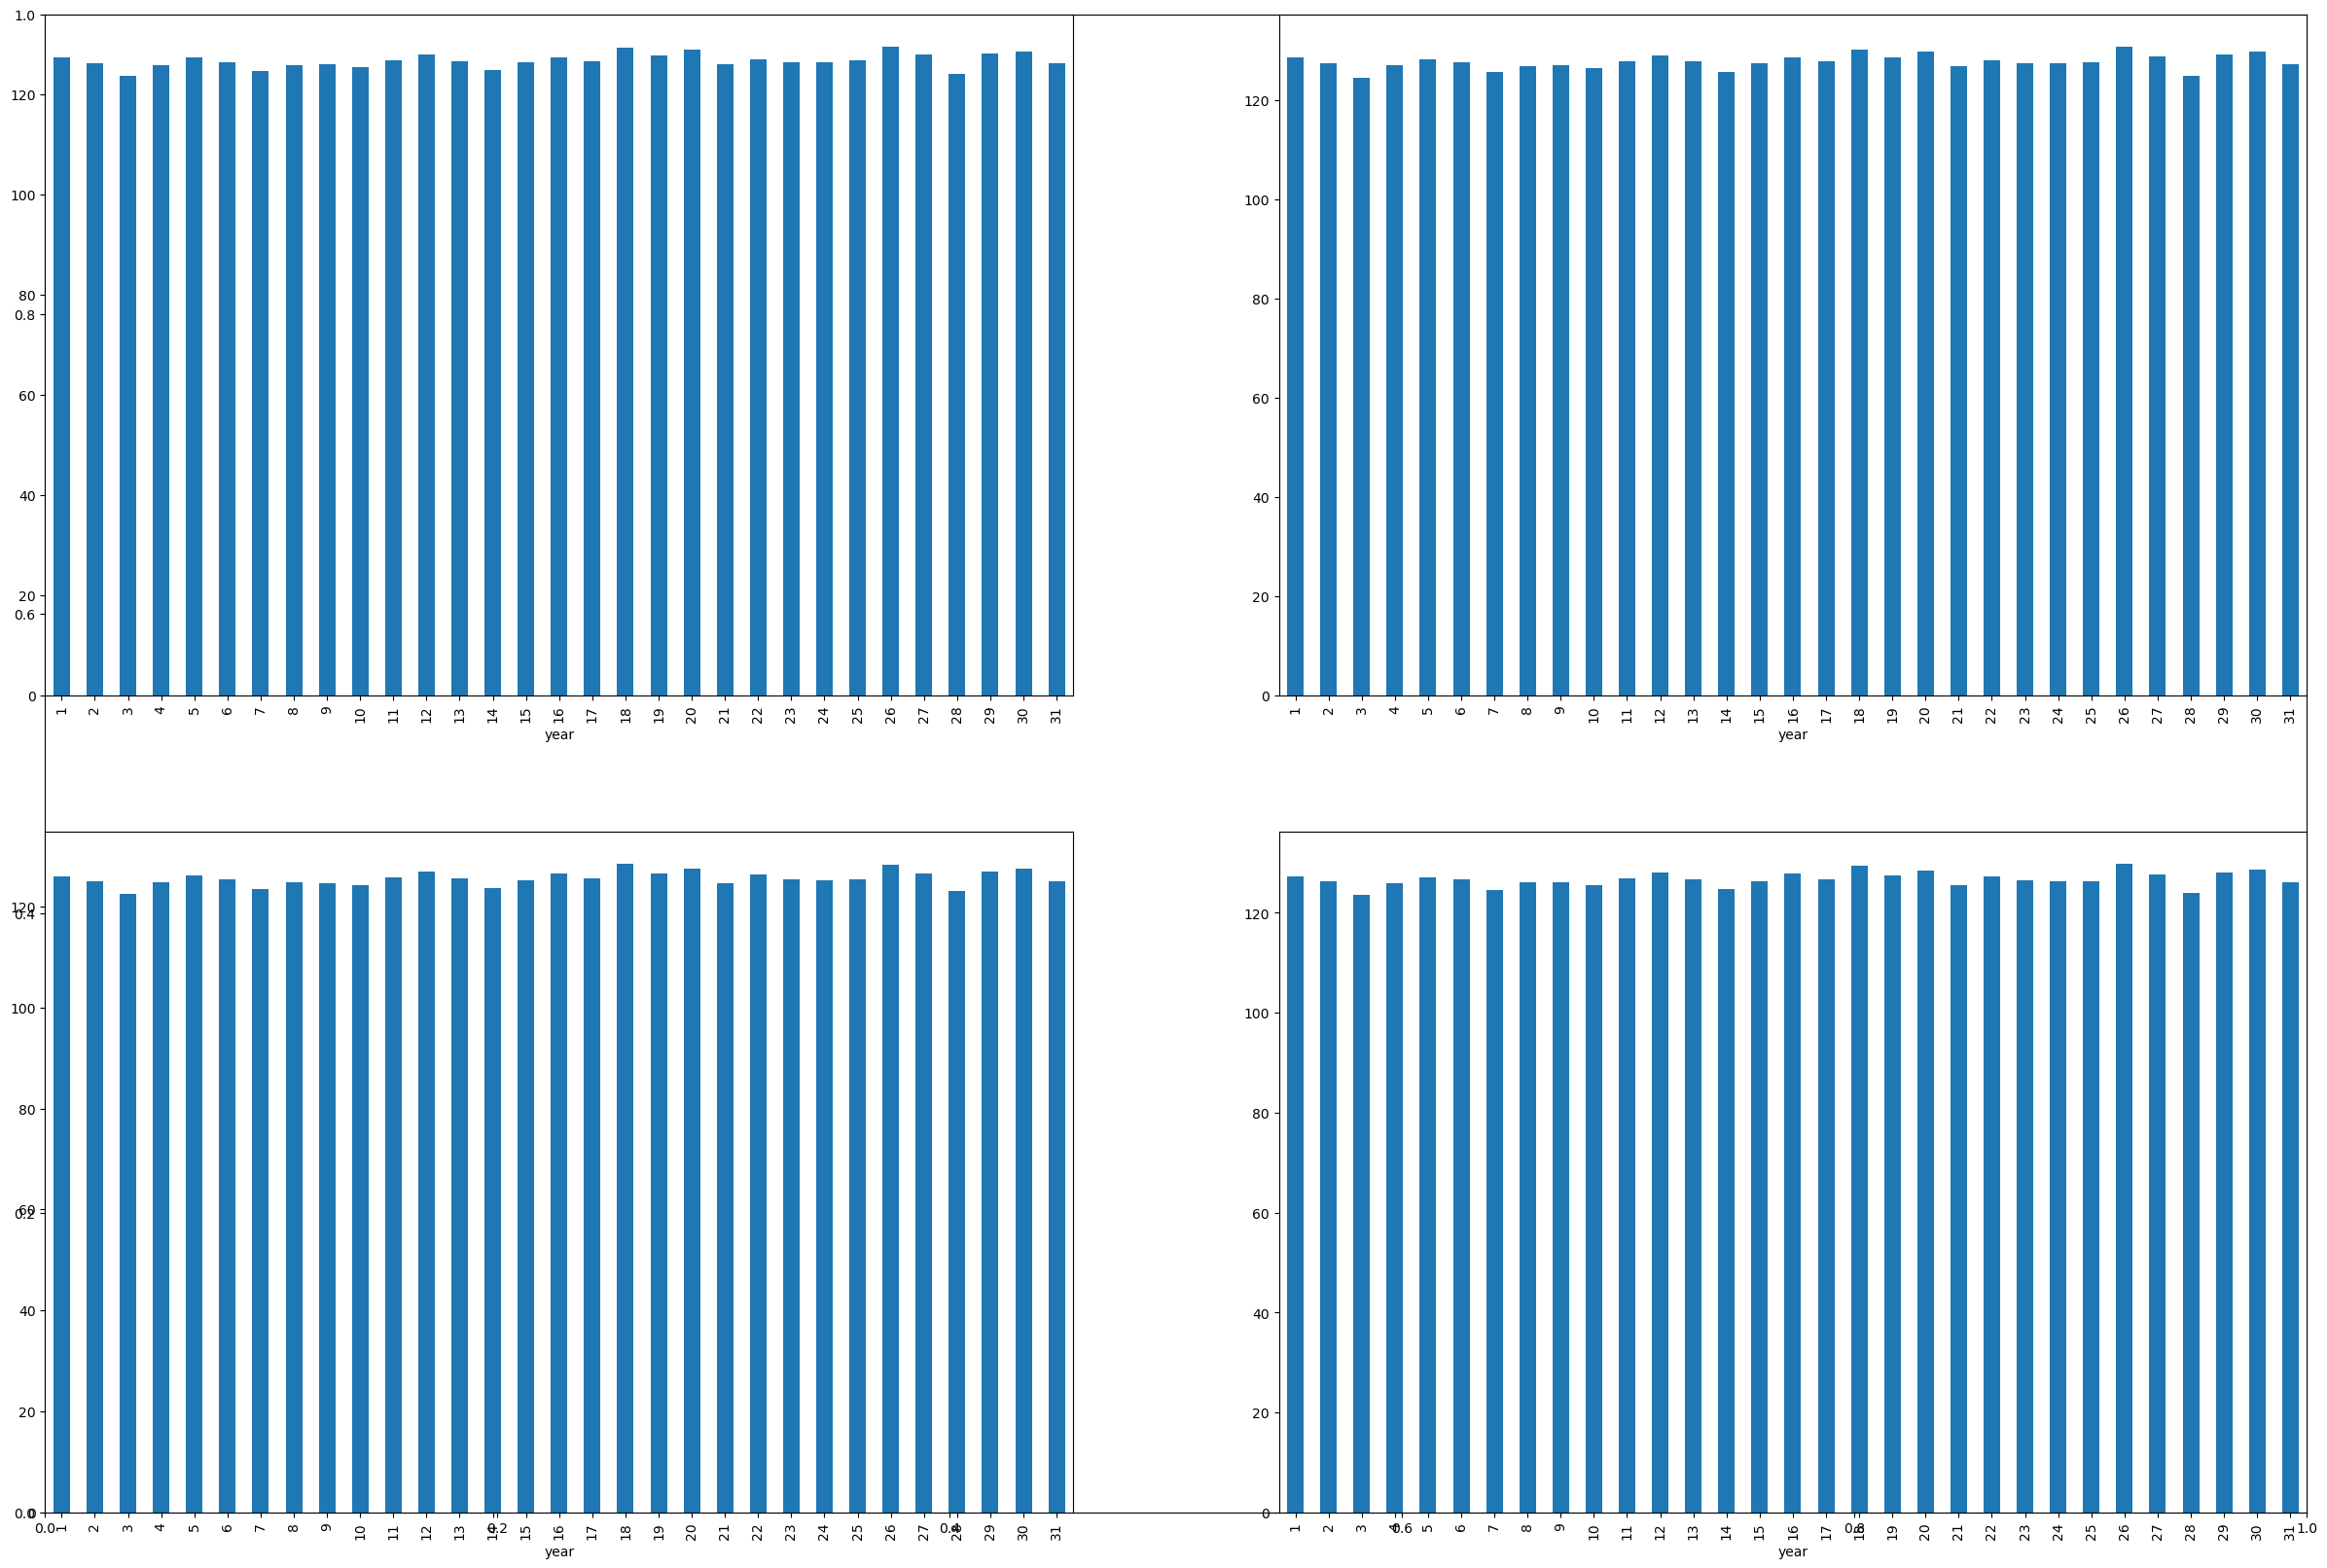

In [39]:
#plot the average values for different columns
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(30,20))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [40]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()


Open        High         Low       Close   Adj Close  \
is_quarter_end                                                               
0               126.868684  127.957588  125.687996  126.842920  118.633228   
1               126.439275  127.611340  125.401027  126.572074  120.956719   

                      Volume  MA_for_50_days  MA_for_30_days  MA_for_10_days  \
is_quarter_end                                                                 
0               6.156163e+07      118.973401      119.041414       118.81851   
1               5.606155e+07      117.555955      118.547675       120.06124   

                     day        month       year  
is_quarter_end                                    
0               6.531847  2015.201433  15.777070  
1               6.539073  2015.996026  15.654305

In [41]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Pie Chart
**the pie chart is used to display the distribution of the target variable, showing the relative proportions of each class in the dataset. It's a good way to quickly assess how balanced or imbalanced the classes are**

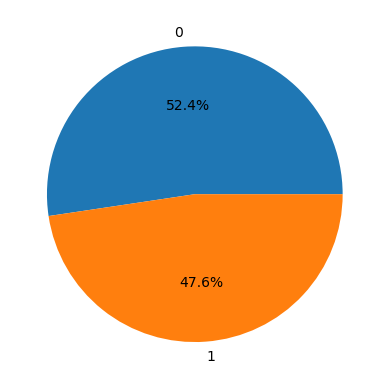

In [42]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

# Heat Map

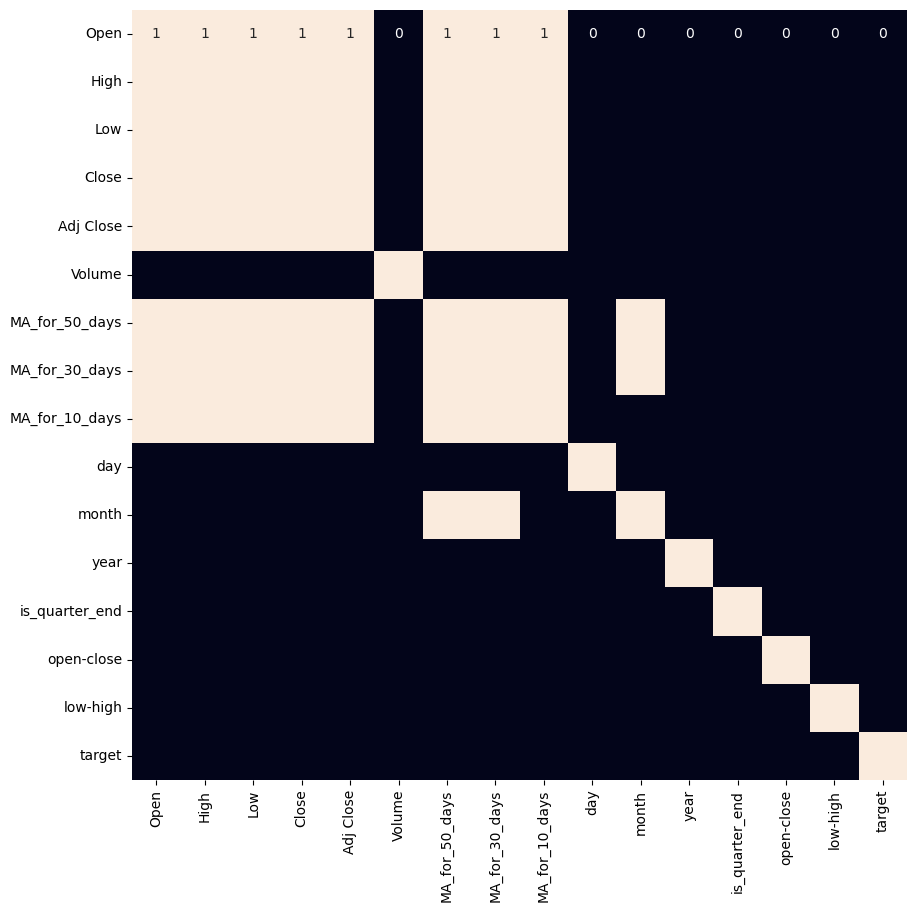

In [43]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

# Data Splitting and Normalization


In [44]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1809, 3) (202, 3)


# **Model Building  and Evaluation**



# models
1) Logistic Regression
2) SVC (Poly)
3) XGBClassifier
4) LSTM
5) RNN

In [45]:

# Assuming X_train, Y_train, X_valid, and Y_valid are already defined

# Reshape the data for LSTM/RNN
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # (samples, timesteps, features)
X_valid_lstm = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))  # (samples, timesteps, features)

# Define models
models = [
    LogisticRegression(),
    SVC(kernel='poly', probability=True),
    XGBClassifier(),
    Sequential([LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], 1)),
                Dense(1, activation='sigmoid')]),
    Sequential([SimpleRNN(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], 1)),
                Dense(1, activation='sigmoid')])
]

# Fit models and calculate ROC AUC scores
for model in models:
    print(f'{model} : ')

    # Train the model
    if isinstance(model, Sequential):  # LSTM or RNN models
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_lstm, Y_train, epochs=10, batch_size=32, verbose=0)
        y_train_pred = model.predict(X_train_lstm)
        y_valid_pred = model.predict(X_valid_lstm)
    else:  # Logistic Regression, SVC, XGBClassifier
        model.fit(X_train, Y_train)
        y_train_pred = model.predict_proba(X_train)[:, 1]
        y_valid_pred = model.predict_proba(X_valid)[:, 1]

    # Calculate ROC AUC score
    print('Training ROC AUC : ', roc_auc_score(Y_train, y_train_pred))
    print('Validation ROC AUC : ', roc_auc_score(Y_valid, y_valid_pred))
    print()


LogisticRegression() : 
Training ROC AUC :  0.5218211741310103
Validation ROC AUC :  0.4618577075098814

SVC(kernel='poly', probability=True) : 
Training ROC AUC :  0.4819846737477316
Validation ROC AUC :  0.46037549407114625

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training ROC

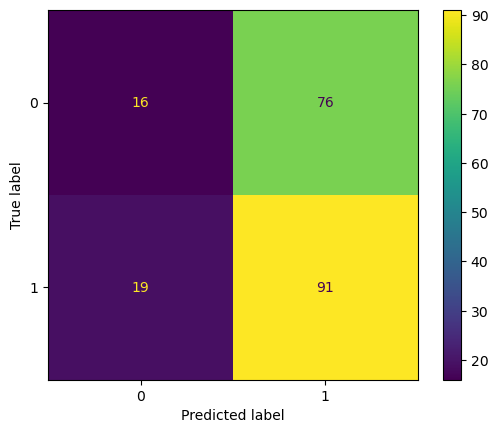

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)

In [47]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'MA_for_50_days', 'MA_for_30_days', 'MA_for_10_days', 'day', 'month',
       'year', 'is_quarter_end', 'open-close', 'low-high', 'target'],
      dtype='object')

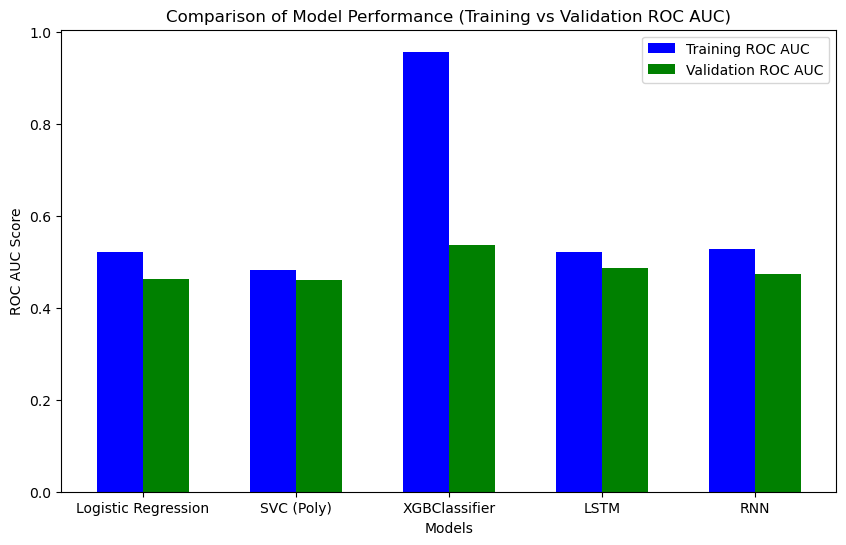

In [48]:
import matplotlib.pyplot as plt

# Define the model names and corresponding ROC AUC scores (training and validation)
models = ['Logistic Regression', 'SVC (Poly)', 'XGBClassifier', 'LSTM', 'RNN']
training_roc_auc = [0.5218, 0.4820, 0.9564, 0.5221, 0.5278]
validation_roc_auc = [0.4619, 0.4604, 0.5365, 0.4853, 0.4739]

# Create the figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot ROC AUC scores for training and validation
width = 0.3  # Width of bars
x = range(len(models))

plt.bar(x, training_roc_auc, width=width, label='Training ROC AUC', color='blue', align='center')
plt.bar([p + width for p in x], validation_roc_auc, width=width, label='Validation ROC AUC', color='green', align='center')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Model Performance (Training vs Validation ROC AUC)')
plt.xticks([p + width/2 for p in x], models)  # Position the x-ticks in the center of the bars
plt.legend()

# Display the plot
plt.show()


In [49]:

# Extracting the 'Adj Close' column from the DataFrame
Adj_close_price = df[['Adj Close']]

In [50]:
# Finding the maximum and minimum values from the 'Adj Close' column
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([289.522614]), array([48.921928]))

In [51]:
# Importing MinMaxScaler from sklearn for data normalization
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler with the feature range of 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
# Applying MinMax scaling to the 'Adj Close' data
scaled_data = scaler.fit_transform(Adj_close_price)

# The scaled data is now normalized between 0 and 1
scaled_data

array([[0.00766324],
       [0.00879718],
       [0.01115228],
       ...,
       [0.99335426],
       [0.99290018],
       [1.        ]])

In [52]:

# Calculating the length of the scaled data array
len(scaled_data)

2011

In [53]:
# Initializing empty lists for input (x_data) and output (y_data)
x_data = []
y_data = []
# Looping through the scaled data to create sequences of 30 time steps
for i in range(30, len(scaled_data)):
    x_data.append(scaled_data[i-30:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [54]:
# Accessing the first sample of x_data (input sequence) and y_data (target value)
x_data[0],y_data[0]

(array([[0.00766324],
        [0.00879718],
        [0.01115228],
        [0.0133944 ],
        [0.01305069],
        [0.01382542],
        [0.01347133],
        [0.01287622],
        [0.01206551],
        [0.0145745 ],
        [0.01683723],
        [0.01613946],
        [0.01231692],
        [0.01596499],
        [0.01237338],
        [0.02584185],
        [0.02480027],
        [0.02615992],
        [0.02909992],
        [0.03088035],
        [0.03073158],
        [0.03018253],
        [0.03252222],
        [0.03472333],
        [0.0372169 ],
        [0.04124458],
        [0.04970552],
        [0.04983367],
        [0.05454378],
        [0.05806354]]),
 array([0.05201428]))

In [55]:
# Calculating 70% of the length of x_data as an integer
int(len(x_data)*0.7)


1386

In [56]:
# Defining the splitting index as 70% of the total data length
splitting_len = int(len(x_data)*0.7)
# Splitting the input data into training and testing sets

x_train = x_data[:splitting_len] # First 70% for training
y_train = y_data[:splitting_len] # Remaining 30% for testing

# Splitting the target data into training and testing sets
x_test = x_data[splitting_len:] # First 70% for training
y_test = y_data[splitting_len:] # Remaining 30% for testing

In [57]:
# Printing the shapes of the training and testing datasets
print(x_train.shape) # Shape of the input training data
print(y_train.shape) # Shape of the target training data
print(x_test.shape)   # Shape of the input testing data
print(y_test.shape) # Shape of the target testing data

(1386, 30, 1)
(1386, 1)
(595, 30, 1)
(595, 1)


In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [61]:
# Building the sequential model
model = Sequential()
# Adding the first LSTM layer with 128 units, returning sequences for the next LSTM layer
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
# Adding a second LSTM layer with 64 units, not returning sequences
model.add(LSTM(64,return_sequences=False))
# Adding a dense layer with 25 units
model.add(Dense(25))
# Adding the final dense layer with 1 unit for the output
model.add(Dense(1))

In [62]:
# Compiling the model with the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
# Training the model with the training data
# Using a batch size of 1 and running for 3 epochs
model.fit(x_train, y_train, batch_size=1, epochs = 3)

Epoch 1/3
1386/1386 [==============================] - 29s 16ms/step - loss: 3.8470e-04
Epoch 2/3
1386/1386 [==============================] - 25s 18ms/step - loss: 1.5652e-04
Epoch 3/3
1386/1386 [==============================] - 26s 19ms/step - loss: 1.4765e-04


In [64]:
# Displaying the summary of the model to see the architecture and the number of parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30, 128)           66560     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Using the trained model to make predictions on the test data
predictions = model.predict(x_test)

19/19 [==============================] - 2s 17ms/step


In [66]:
# Inverse transforming the predictions to get the original scale values using the scaler
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[153.51283],
       [152.08167],
       [151.39697],
       [152.84184],
       [154.00505],
       [154.05797],
       [154.21315],
       [155.20471],
       [156.5794 ],
       [157.43614],
       [158.02911],
       [158.19186],
       [156.96983],
       [156.11575],
       [155.46631],
       [153.75075],
       [154.64716],
       [155.16129],
       [154.66095],
       [153.47758],
       [153.81606],
       [153.51326],
       [153.33987],
       [151.72049],
       [149.23814],
       [147.21672],
       [145.7557 ],
       [146.88594],
       [148.53873],
       [148.79086],
       [149.09254],
       [148.9455 ],
       [149.12393],
       [148.60518],
       [149.3614 ],
       [149.81705],
       [150.26054],
       [150.44592],
       [150.83116],
       [150.67424],
       [151.08446],
       [153.04538],
       [154.45804],
       [154.48827],
       [151.9605 ],
       [150.59875],
       [150.21672],
       [150.88109],
       [151.0226 ],
       [151.63292],


In [67]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[151.282242],
       [151.003662],
       [153.472183],
       [153.664276],
       [152.9823  ],
       [153.549042],
       [155.095474],
       [156.478622],
       [156.90126 ],
       [157.525589],
       [157.573639],
       [155.681396],
       [155.518097],
       [154.893768],
       [152.367615],
       [155.124313],
       [154.509583],
       [153.347336],
       [152.031403],
       [153.568253],
       [152.406006],
       [152.463638],
       [149.908676],
       [147.334442],
       [145.893661],
       [144.606583],
       [147.094315],
       [148.141296],
       [147.228806],
       [148.035614],
       [147.737885],
       [148.381439],
       [147.420914],
       [149.255493],
       [149.169022],
       [149.687729],
       [149.745346],
       [150.369705],
       [149.841446],
       [150.792358],
       [153.568253],
       [154.134949],
       [153.452988],
       [149.822205],
       [150.081558],
       [150.004715],
       [150.897995],
       [150.2

In [69]:
# Calculating the Root Mean Squared Error (RMSE) between the predicted values and the actual test values
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [70]:
rmse

3.4057276296336547

In [71]:
# Creating a DataFrame to compare the original test data and predictions
# Reshaping the data to 1D arrays and using the appropriate index from the original dataset
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1), # Reshaped actual values
    'predictions': inv_predictions.reshape(-1)  # Reshaped predicted values
 } ,
    index = df.index[splitting_len+30:]  # Index corresponding to the test data
)

In [72]:
ploting_data

original_test_data  predictions
1416          151.282242   153.512833
1417          151.003662   152.081665
1418          153.472183   151.396973
1419          153.664276   152.841843
1420          152.982300   154.005051
...                  ...          ...
2006          282.054138   275.602783
2007          282.322266   278.332520
2008          287.923645   280.029938
2009          287.814392   284.245667
2010          289.522614   285.937622

[595 rows x 2 columns]

<Figure size 1500x600 with 0 Axes>

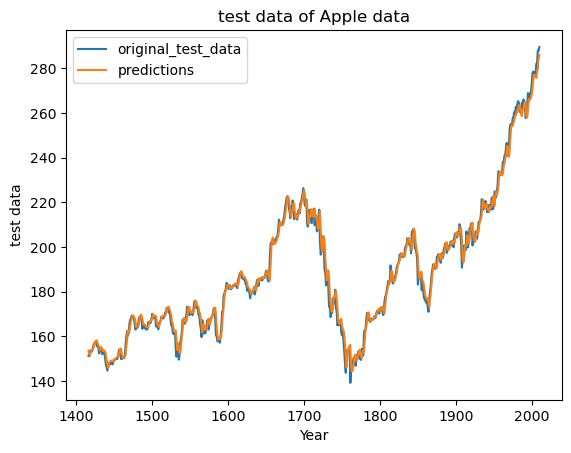

In [73]:
# Plotting the original test data and predictions using the specified figure size
# Assuming 'plot_graph' is a function to plot the data, with the figure size and title as parameters
plot_graph((15,6), ploting_data, 'test data')

<Figure size 1500x600 with 0 Axes>

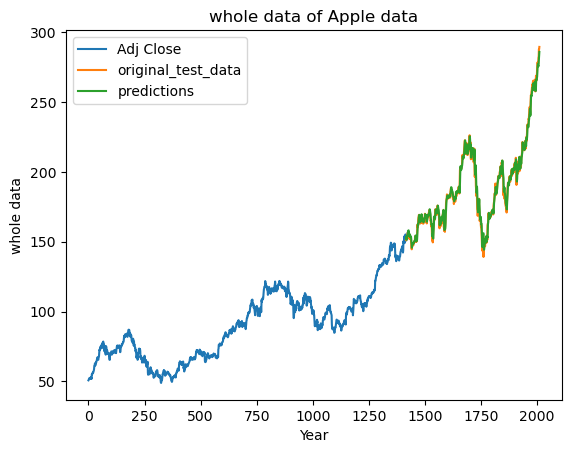

In [74]:
# Plotting the whole data by concatenating the original 'Adj Close' data with the 'plotting_data' 
# The 'plotting_data' contains the test predictions and actual values, so we concatenate it with the first part of the dataset.
# 'plot_graph' is assumed to be a function that accepts the figure size, data, and title as arguments.

plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+50],ploting_data], axis=0), 'whole data')